In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import os
import sys
import importlib
path_my_modules = "/home/born-again/Documents/GitHub/my_modules"
module_path = os.path.abspath(f'{path_my_modules}/config')
if module_path not in sys.path:
    sys.path.append(module_path)

import cfg
importlib.reload(cfg)

module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_utilities}')
if module_path not in sys.path:
    sys.path.append(module_path)

import utilities as utl
importlib.reload(utl)

module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_plot_style}')
if module_path not in sys.path:
    print(sys.path.append(module_path))
    sys.path.append(module_path)

import plotter
importlib.reload(plotter)

module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_spectral_models}')
if module_path not in sys.path:
    sys.path.append(module_path)

import spectral_models as spec
importlib.reload(spec)

module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_lhaaso_analysis}')
if module_path not in sys.path:
    print(sys.path.append(module_path))
    sys.path.append(module_path)

import lhaaso_analysis as lhaaso
importlib.reload(lhaaso)

module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_gammapy_catalogs}')
if module_path not in sys.path:
    print(sys.path.append(module_path))
    sys.path.append(module_path)

import gammapy_catalogs as gammapy_cat
importlib.reload(gammapy_cat)

module_path = os.path.abspath(f'{path_my_modules}/{cfg.dir_cta_simulation}')
if module_path not in sys.path:
    print(sys.path.append(module_path))
    sys.path.append(module_path)

import cta_simulation as cta
importlib.reload(cta)

%matplotlib inline
import matplotlib.pyplot as plt # A collection of command style functions


path_my_plot_style = f"{path_my_modules}/{cfg.dir_plot_style}/my_plot_style.txt" 
plt.style.use(path_my_plot_style)

None
None
None
None
None
None


In [2]:
from gammapy.catalog import CATALOG_REGISTRY
catalog = CATALOG_REGISTRY.get_cls("hgps")()

In [3]:
target_name = "HESS J1825-137"
target = catalog[target_name]

In [4]:
print(target.info())


*** Basic info ***

Catalog row index (zero-based) : 54
Source name          : HESS J1825-137
Analysis reference   : HGPS
Source class         : PWN
Identified object    : PSR J1826-1334
Gamma-Cat id         : 118


*** Info from map analysis ***

RA                   :  276.260 deg = 18h25m02s
DEC                  :  -13.966 deg = -13d57m57s
GLON                 :   17.525 +/- 0.082 deg
GLAT                 :   -0.618 +/- 0.011 deg
Position Error (68%) : 0.125 deg
Position Error (95%) : 0.203 deg
ROI number           : 6
Spatial model        : 3-Gaussian
Spatial components   : HGPSC 065, HGPSC 066, HGPSC 067
TS                   : 5846.8
sqrt(TS)             : 76.5
Size                 : 0.461 +/- 0.032 (UL: 0.000) deg
R70                  : 0.709 deg
RSpec                : 0.500 deg
Total model excess   : 18291.5
Excess in RSpec      : 9525.5
Model Excess in RSpec : 9408.8
Background in RSpec  : 8608.5
Livetime             : 109.1 hours
Energy threshold     : 0.40 TeV
Source flux (>

In [5]:
pos = target.position

source_name = target.name
source_RA = pos.ra
source_dec = pos.dec

source_info = utl.set_source_info(source_name, source_RA, source_dec)
source_info

{'name': 'HESS J1825-137',
 'position': <SkyCoord (ICRS): (ra, dec) in deg
     (276.259552, -13.96583366)>}

In [8]:
from astropy import units as u

# target size: 0.461 +/- 0.032
radius_roi =1 * u.Unit("deg")  # maximum angle of separation (in degrees)
# e_ref_min = 100 * u.Unit("GeV")
# # e_ref_max = 10 * u.Unit("TeV")

# REVER: chamar (com source_name, source_RA, source_dec) source_info dentro
# REVER: region_of_interest[name] -> region_of_interest[source_name]
region_of_interest = utl.create_region_of_interest(source_info, radius_roi)
region_of_interest

datasets_name = "counterparts_joint"

datasets, models = utl.get_datasets_flux_points(region_of_interest)

#  Creates a Datasets/Models object containing the joint datasets/models.
datasets_joint = datasets.copy()
models_joint =  models.copy()  # global models object

print(datasets_joint)

The error is: (2HWC J1825-134) 'SourceCatalogObject2HWC' object has no attribute 'flux_points'
The error is: (3HWC J1825-134) 'SourceCatalogObject3HWC' object has no attribute 'flux_points'
Total number of Gammapy sources: 22
Total number of flux points tables: 20


e_ref,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,is_ul
TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),
int64,float64,float64,float64,float64,bool
7,6.76e-12,3.97e-13,3.97e-13,6.76e-12,False


e_ref,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,is_ul
TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),
float64,float64,float64,float64,float64,bool
1.41,1.5945e-11,4.901e-12,5.3017e-12,1.5945e-11,False
2.03,1.1689e-11,1.676e-12,1.7058e-12,1.1689e-11,False
2.98,1.482e-11,1.7193e-12,1.6873e-12,1.482e-11,False
5.17,1.436e-11,1.4456e-12,1.4006e-12,1.436e-11,False
9.2,9.1278e-12,1.1029e-12,1.0766e-12,9.1278e-12,False
14.91,9.0496e-12,9.256e-13,9.1824e-13,9.0496e-12,False
27.4,4.7312e-12,7.6108e-13,7.6535e-13,4.7312e-12,False
49.41,2.5151e-12,7.6429e-13,7.2337e-13,2.5151e-12,False


e_ref,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,is_ul
TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),
float64,float64,float64,float64,float64,bool
1.22,8.9715e-12,nan,nan,8.9715e-12,True
1.81,2.7033e-12,8.7828e-13,8.5899e-13,2.7033e-12,False
2.7,2.371e-12,8.9476e-13,8.8875e-13,2.371e-12,False
4.95,1.7245e-12,6.0025e-13,5.9842e-13,1.7245e-12,False
9.55,1.2613e-12,4.3646e-13,4.2879e-13,1.2613e-12,False
16.48,1.7479e-12,3.9136e-13,3.9124e-13,1.7479e-12,False
33.0,1.0986e-12,3.547e-13,3.5527e-13,1.0986e-12,False
66.79,9.9245e-13,3.2582e-13,3.3499e-13,9.9245e-13,False


e_ref,e_min,e_max,e2dnde,e2dnde_errp,e2dnde_errn,e2dnde_ul,is_ul
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),
float64,float64,float64,float64,float64,float64,float64,bool
1.34,1.0,1.78,2.41e-11,5.6e-12,5.6e-12,2.41e-11,False
1.96,1.78,3.16,2.22e-11,2e-12,2e-12,2.22e-11,False
2.91,3.16,5.62,2.58e-11,2.1e-12,2.1e-12,2.58e-11,False
5.2,5.62,10.0,2.24e-11,1.7e-12,1.7e-12,2.24e-11,False
9.54,10.0,117.8,1.77e-11,1.3e-12,1.3e-12,1.77e-11,False
15.95,17.8,31.6,1.63e-11,1.1e-12,1.1e-12,1.63e-11,False
30.44,31.6,56.2,1.08e-11,9e-13,9e-13,1.08e-11,False
58.18,56.2,100.0,6.22e-12,7.6e-13,7.6e-13,6.22e-12,False


e_ref,e2dnde,e2dnde_errp,e2dnde_errn
TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2)
float64,float64,float64,float64
31.6,1.0385871099902711e-11,3.285530439211237e-12,3.285530439211237e-12
50.1,4.334103963720645e-12,9.227447015682794e-13,9.227447015682794e-13
79.4,3.4453130715174324e-12,4.0844436007422143e-13,4.0844436007422143e-13
126.0,2.3767667179697495e-12,3.5052315586322557e-13,3.5052315586322557e-13
200.0,5.991848773897424e-13,2.436685205084573e-13,2.0572013909422676e-13
316.0,2.3168482308549263e-13,1.8674595150786604e-13,1.4879757633514463e-13
501.0,1.2083561568156038e-13,2.216984085663554e-13,7.749457666850484e-14


Total number of sources outside Gammapy: 5
Total number of flux points tables: 5
0 HESS J1826-130: gamma-cat
1 HESS J1825-137: gamma-cat
2 LS 5039: gamma-cat
3 HESS J1825-137: hgps
4 HESS J1826-130: hgps
5 HESS J1826-148: hgps
6 3FGL J1823.2-1339
7 3FGL J1824.5-1351e
8 3FGL J1826.2-1450
9 3FGL J1827.3-1446
10 4FGL J1823.3-1340
11 4FGL J1824.1-1304
12 4FGL J1824.4-1350e
13 4FGL J1826.2-1450
14 4FGL J1827.4-1445
15 2FHL J1824.5-1350e
16 2FHL J1826.3-1450
17 3FHL J1823.3-1339
18 3FHL J1824.5-1351e
19 3FHL J1826.2-1451
20 2HWC J1825-134
21 HAWC J1825-138
22 HAWC J1825-134
23 eHWC J1825-134
24 LHAASO J1825-1326
dictionary separation saved successfully to file
dictionary leg_style saved successfully to file
dictionary leg_style saved (CTA directory) successfully to file
Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130: gamma-cat
  Instrument : 
  Models     : ['HESS_J1826-130_gamma-cat_ecpl']

Dataset 1: 

  Type       : FluxPointsDataset
  Name 

In [9]:
dict_leg_style = utl.load_dictionary(region_of_interest, datasets_name, cfg.dict_leg_style)
dict_sep = utl.load_dictionary(region_of_interest, datasets_name, cfg.dict_separation)
df_sep = utl.dict_sep_to_df(dict_sep)
df_sep

,Source name,RA(deg),dec.(deg),Sep.(deg)
0,HESS J1826-130: gamma-cat,276.504181,-13.091110,0.906481
1,HESS J1825-137: gamma-cat,276.554413,-13.580040,0.480470
2,LS 5039: gamma-cat,276.562744,-14.848406,0.930143
3,HESS J1825-137: hgps,276.259552,-13.965834,0.000000
4,HESS J1826-130: hgps,276.508728,-13.017380,0.978914
5,HESS J1826-148: hgps,276.562897,-14.847478,0.929310
6,3FGL J1823.2-1339,275.820404,-13.651300,0.529901
7,3FGL J1824.5-1351e,276.129791,-13.852100,0.169706
8,3FGL J1826.2-1450,276.568390,-14.847300,0.930837
9,3FGL J1827.3-1446,276.834015,-14.767200,0.975640


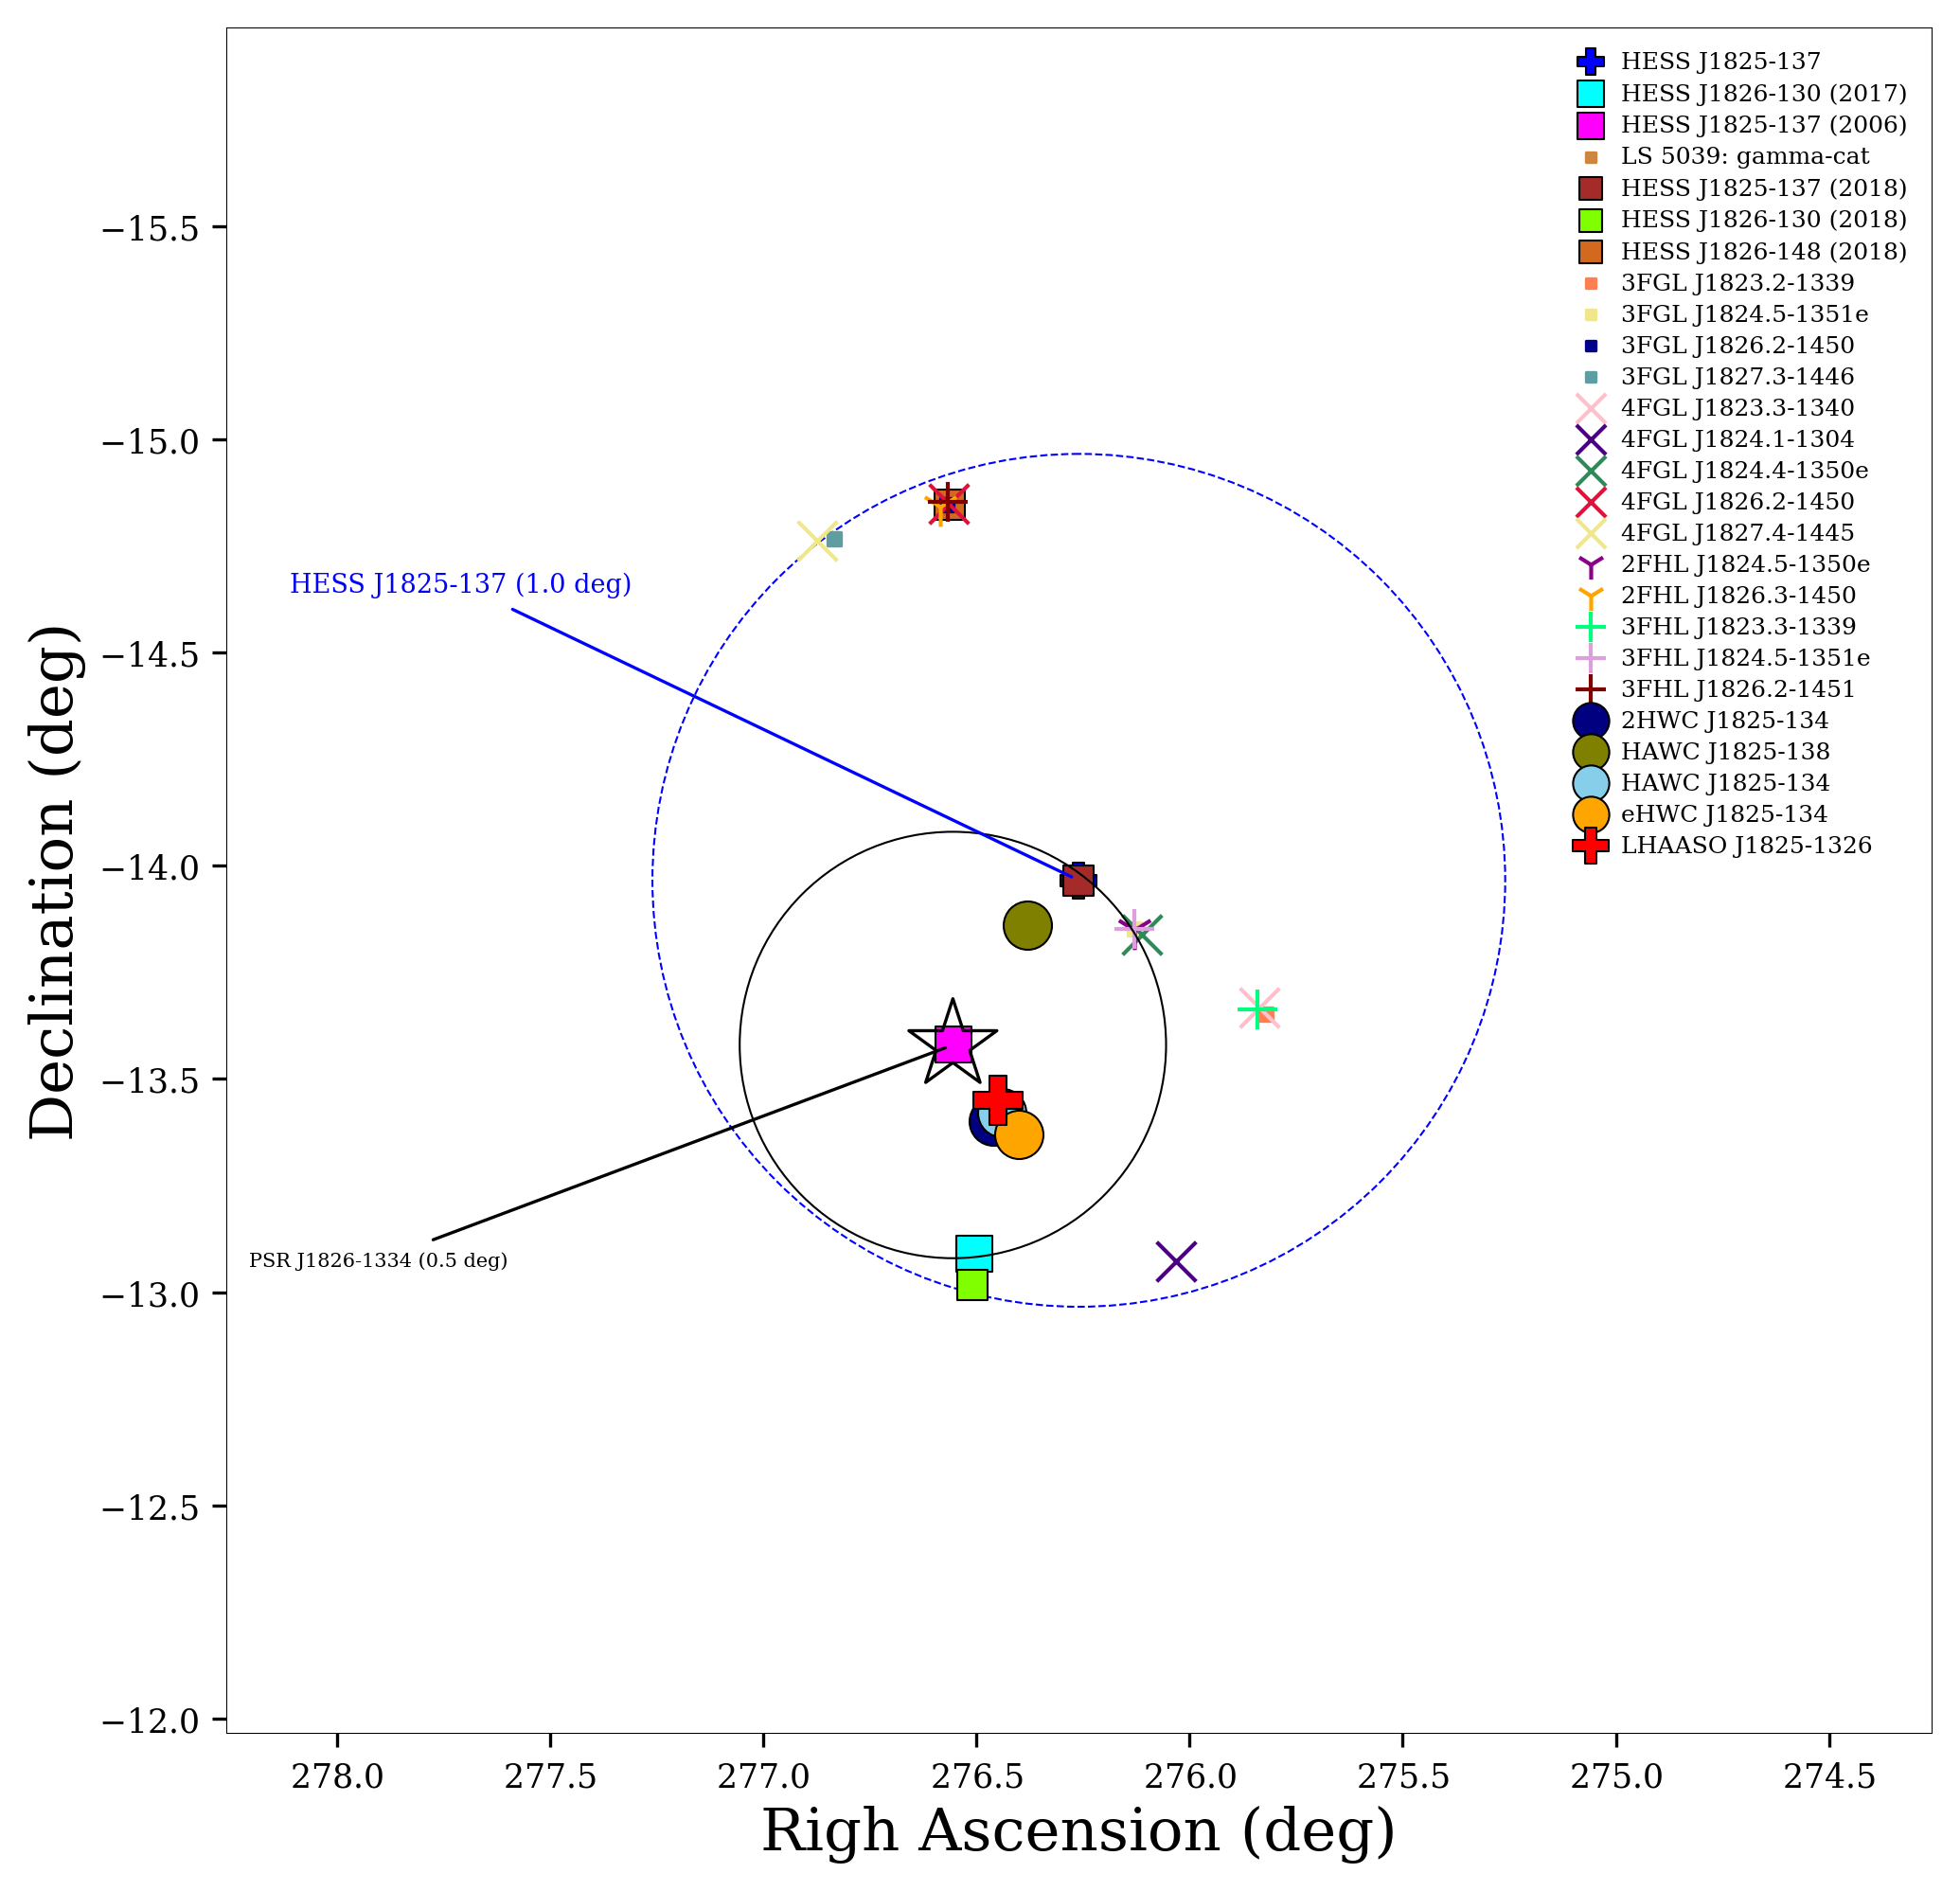

In [10]:






plotter.show_sky_map(datasets_name,
    dict_leg_style, dict_sep, region_of_interest,  width=(1 * u.deg, 10 * u.deg)
)



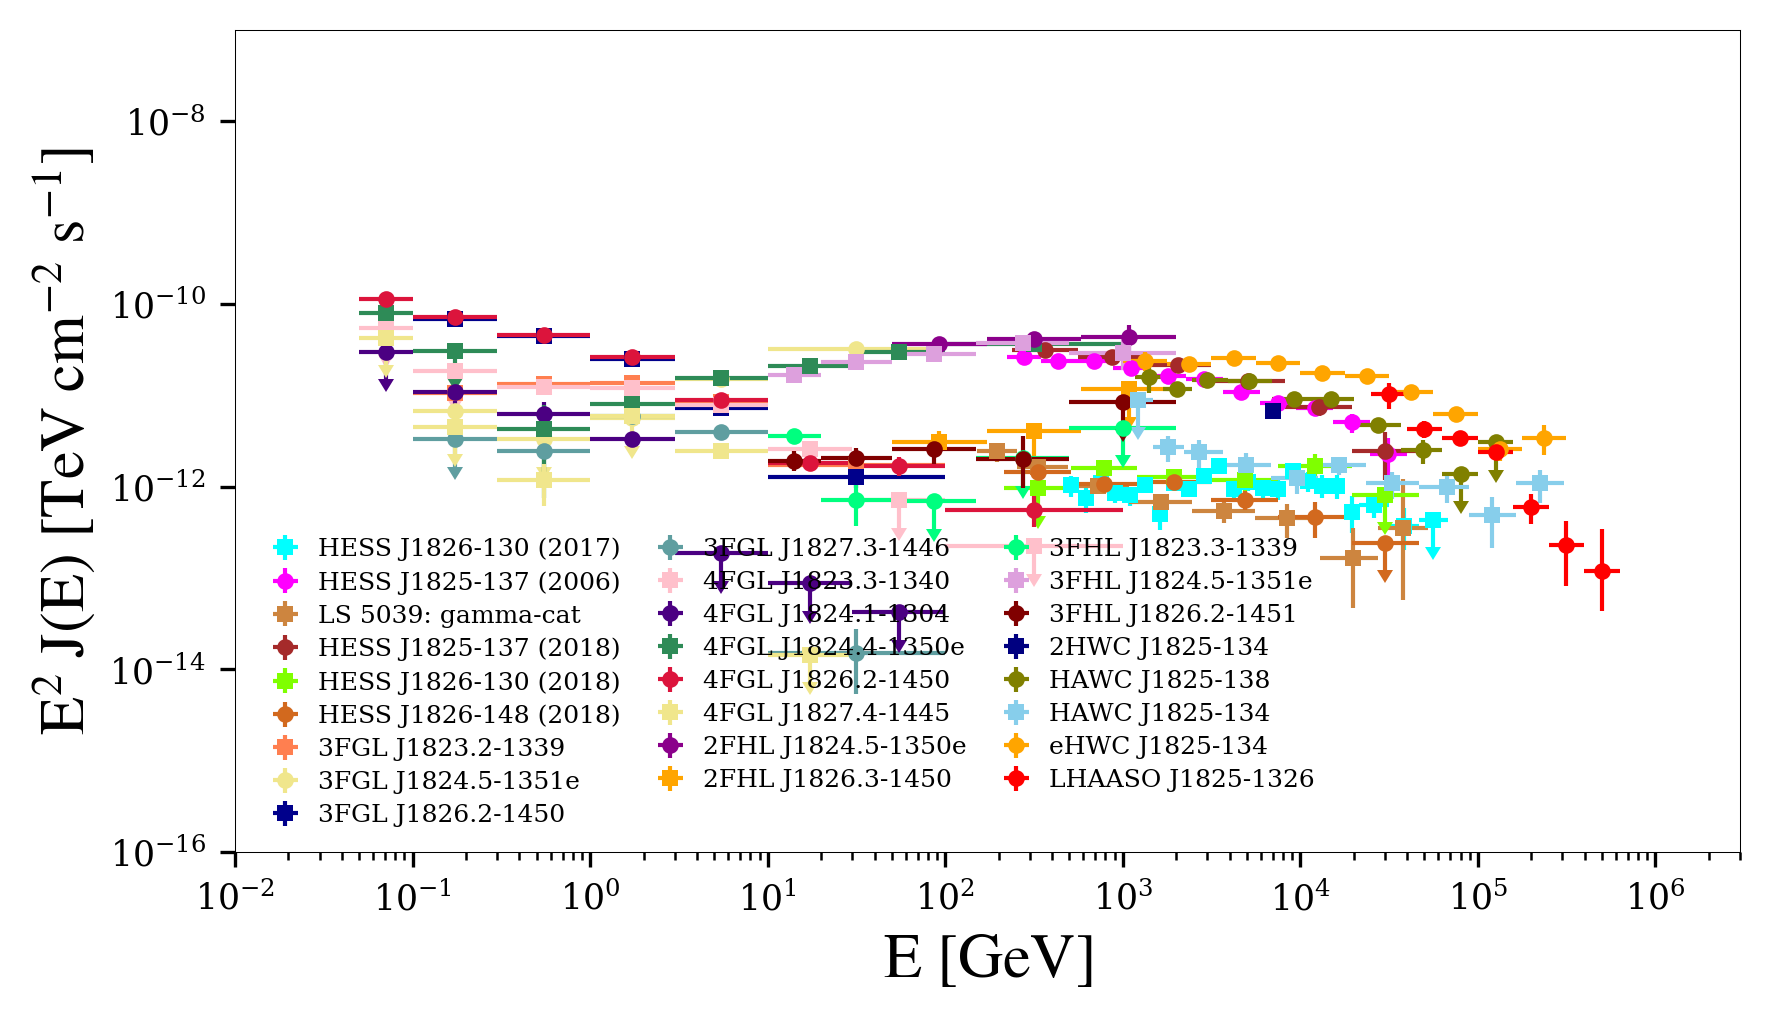

In [16]:
sed_type = cfg.sed_type_e2dnde
dict_plot_axis = dict(
    label =  (r'$\rm{E\ [GeV] }$', r'$\rm{E^2\ J(E)\ [TeV\ cm^{-2}\ s^{-1}] }$'),
    units =  (          'GeV',                       'TeV  cm-2     s-1')
)
dict_leg_place = dict(
    bbox_to_anchor = (0, -0.45), # Set legend outside plot
    ncol=3, 
    loc='lower left', 
)
dict_plot_limits = dict(
    energy_bounds = [1e-5, 3e3] * u.TeV,
    ylim = [1e-16, 1e-7]
)

plotter.plot_SED(
    name = datasets_name, 
    dict_plot_limits = dict(
    energy_bounds = [1e-5, 3e3] * u.TeV,
           ylim = [1e-16, 1e-7]
),
        dict_plot_axis=dict_plot_axis,
    datasets=datasets, 
    dict_leg_style=dict_leg_style, 
    region_of_interest=region_of_interest
)

In [12]:
from gammapy.datasets import Datasets
from gammapy.modeling.models import Models

In [32]:
print(datasets_joint[1])

FluxPointsDataset
-----------------

  Name                            : HESS J1825-137: hgps 

  Number of total flux points     : 6 
  Number of fit bins              : 6 

  Fit statistic type              : chi2
  Fit statistic value (-2 log(L)) : 0.47

  Number of models                : 1 
  Number of parameters            : 5
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : HESS_J1825-137_hgps_ecpl
    Datasets names            : HESS J1825-137: hgps
    Spectral model type       : ExpCutoffPowerLawSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      index                         :      2.151   +/-    0.06             
      amplitude                     :   6.95e-11   +/- 2.9e-12 1 / (TeV s cm2)
      reference             (frozen):      0.650       TeV         
      lambda_                       :      0.074   +/-    0.02 1 / TeV     
      alpha                 (frozen):      1.

In [33]:
datasets = Datasets(datasets_joint[1])

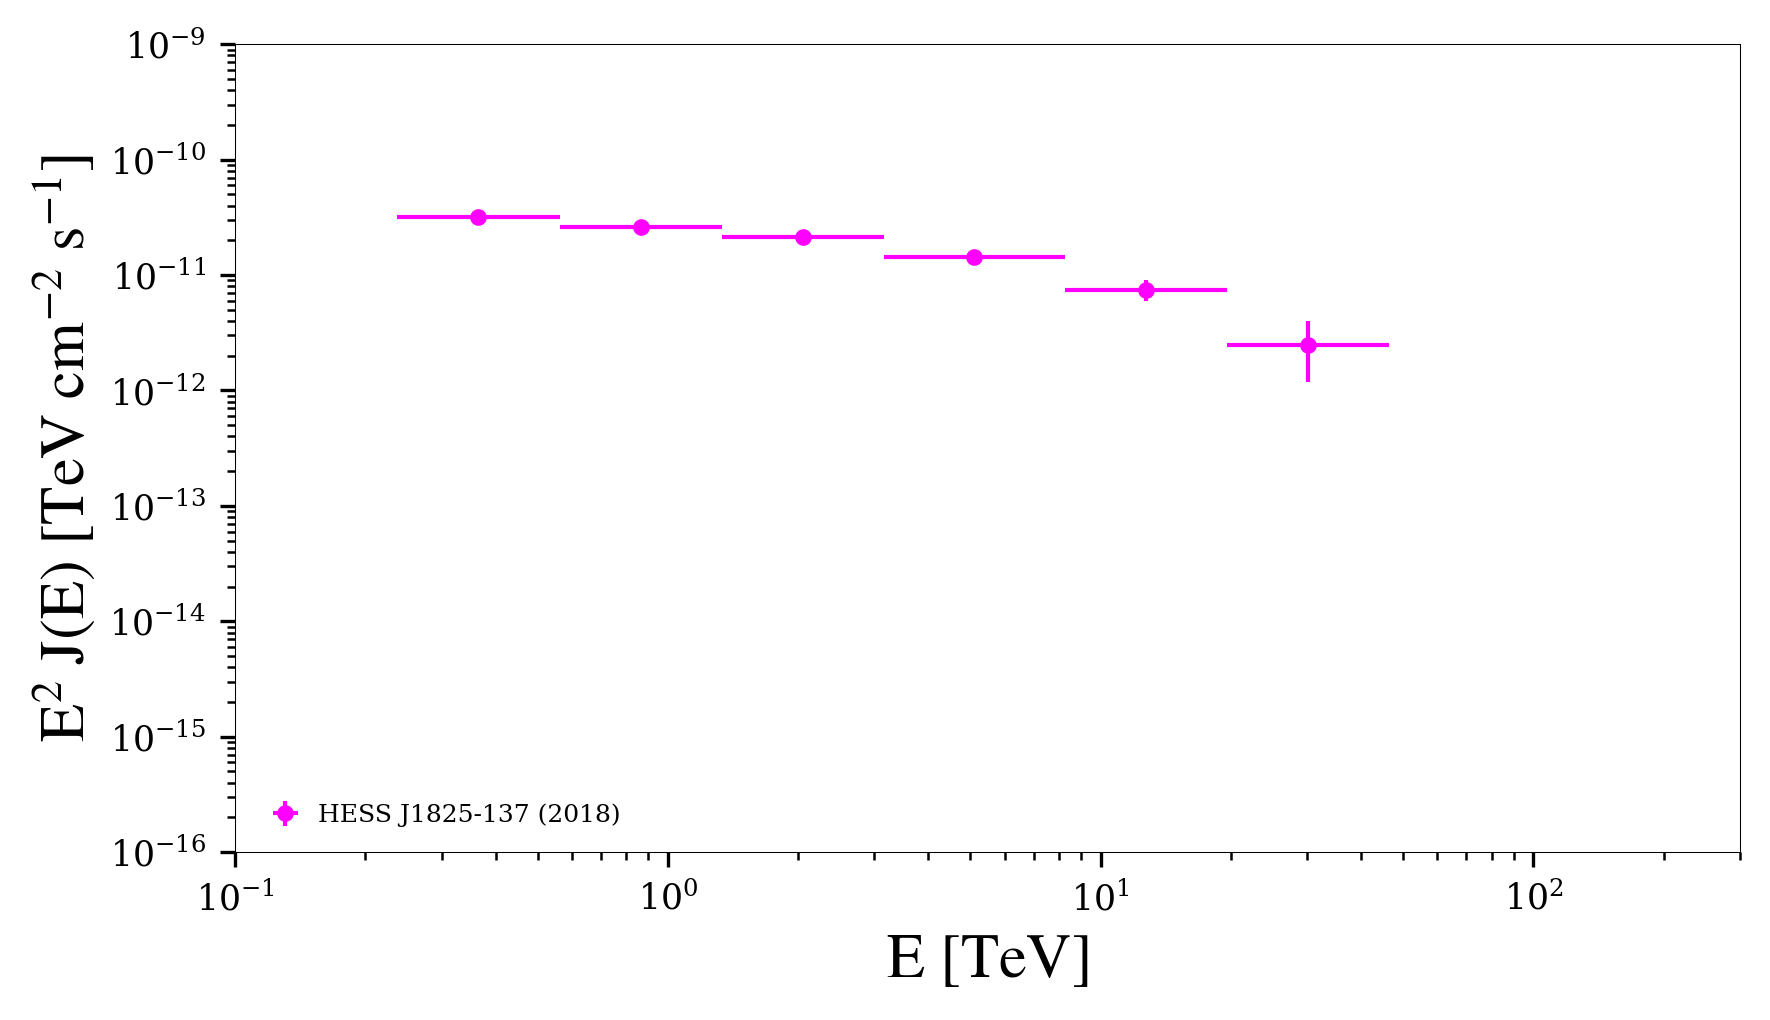

In [34]:
plotter.plot_SED(
    name = datasets_name, 
    dict_plot_limits = dict(
    energy_bounds = [1e-1, 3e2] * u.TeV,
    ylim = [1e-16, 1e-9]
),
    datasets=datasets, 
    dict_leg_style=dict_leg_style, 
    region_of_interest=region_of_interest
)